In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

DATA VISUALIZATION

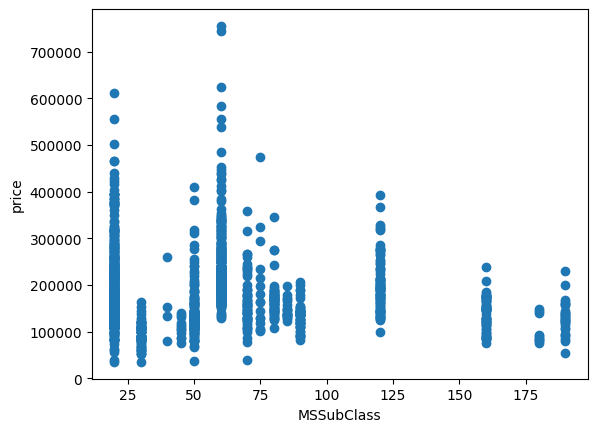

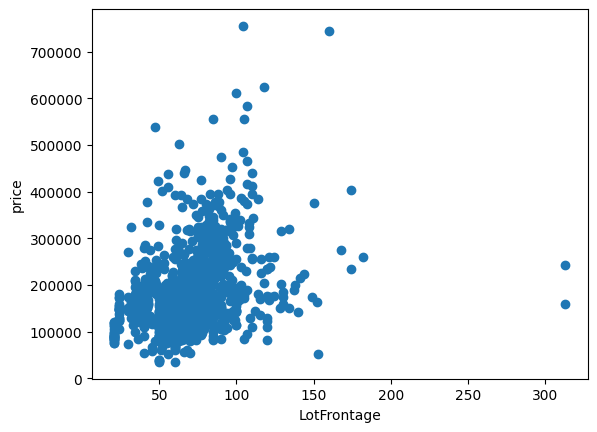

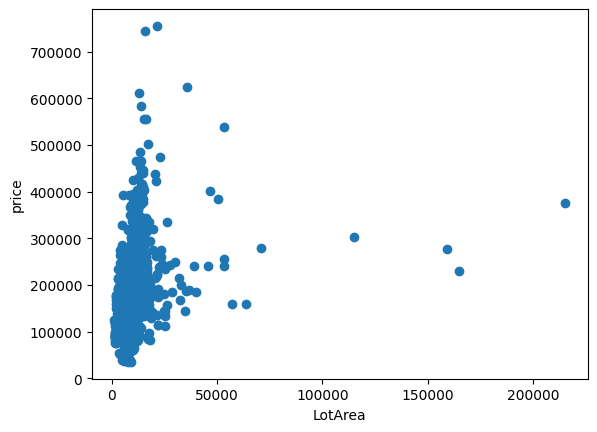

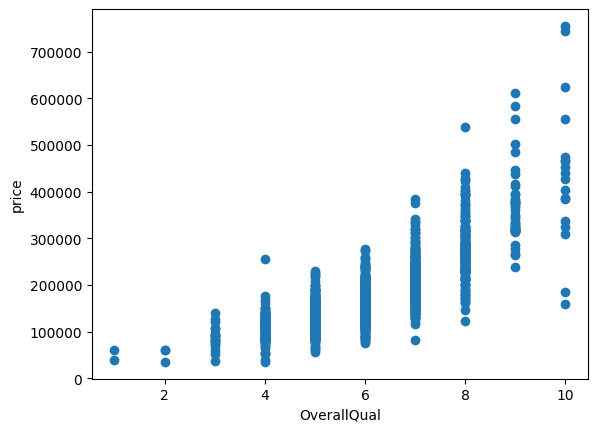

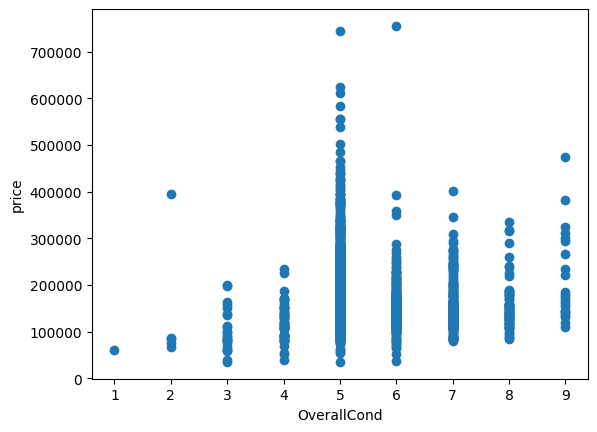

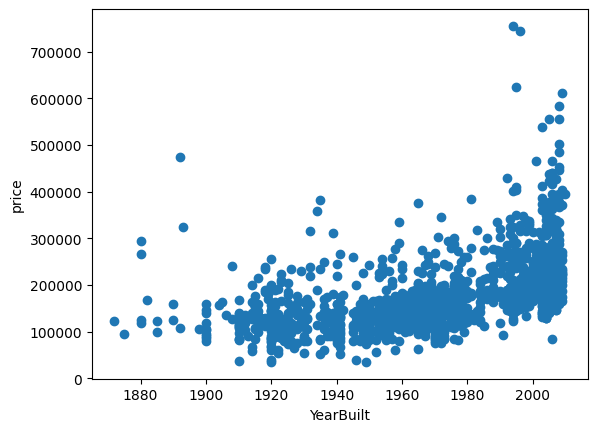

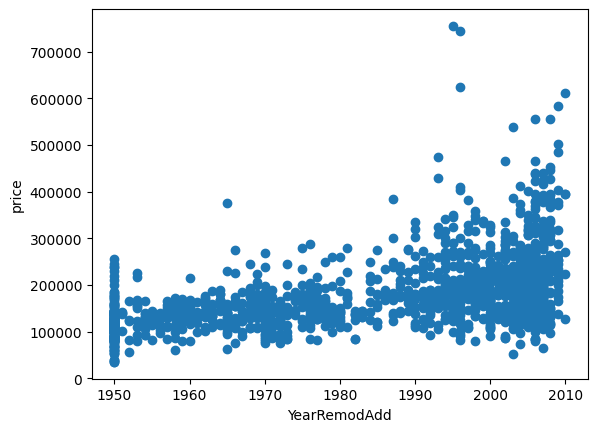

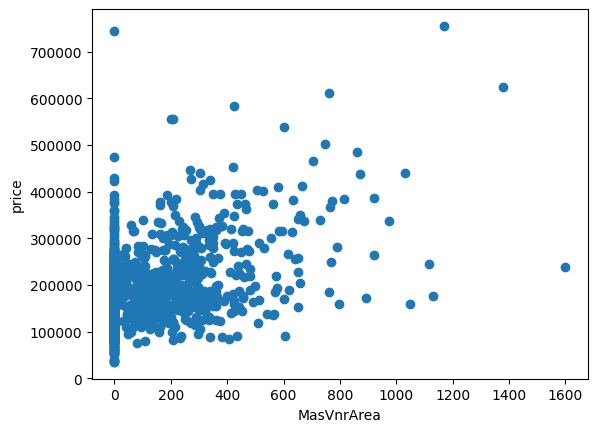

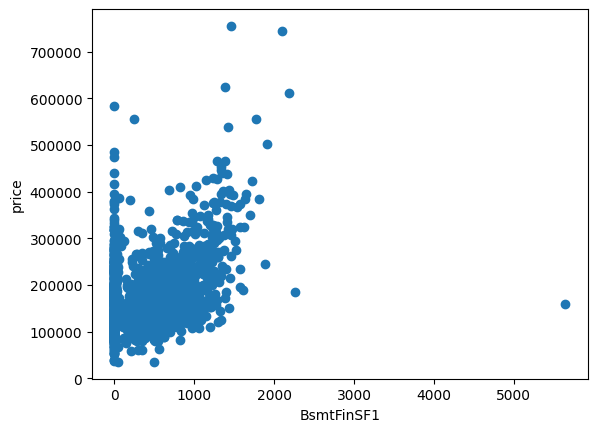

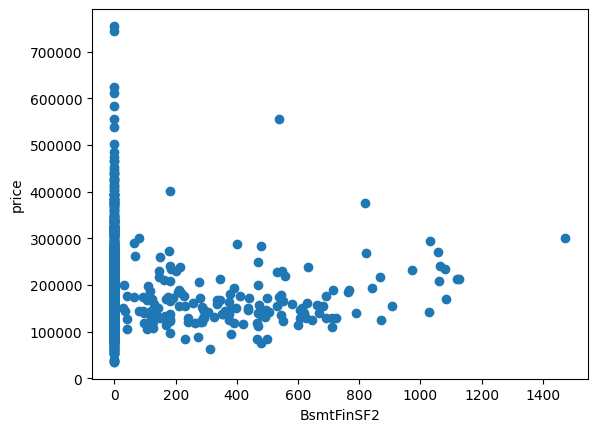

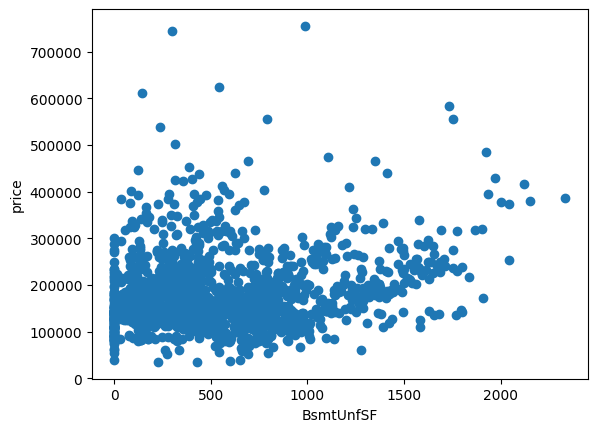

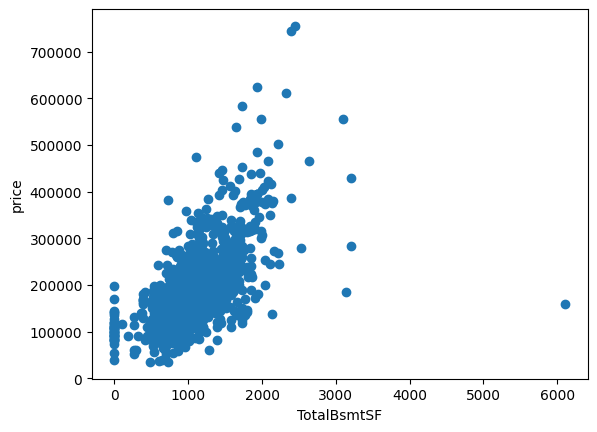

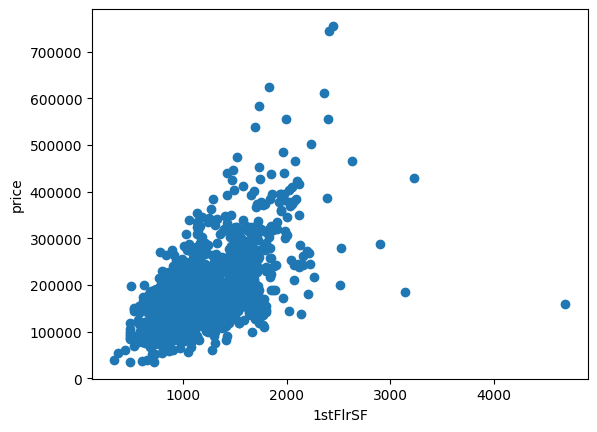

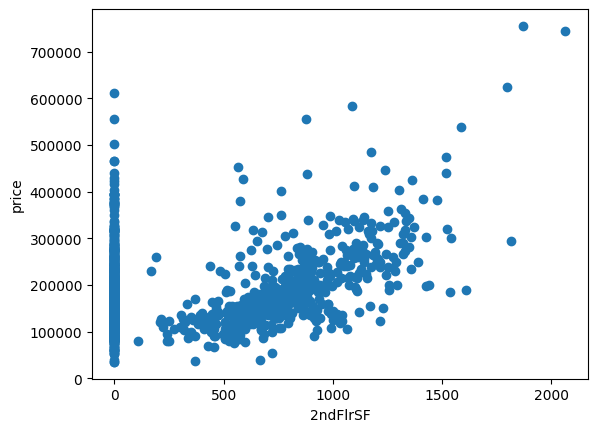

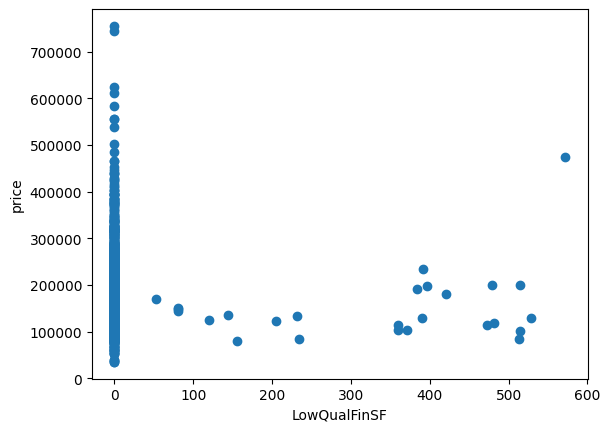

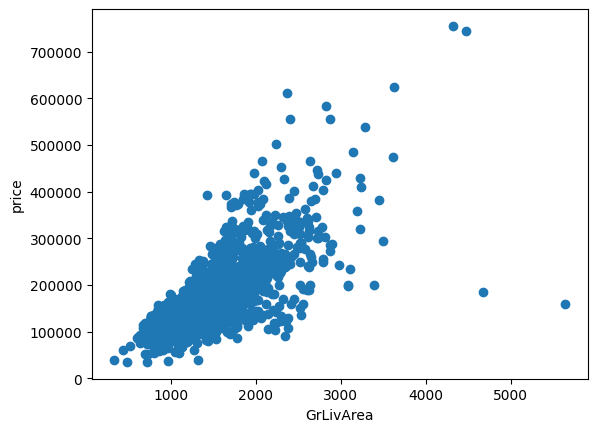

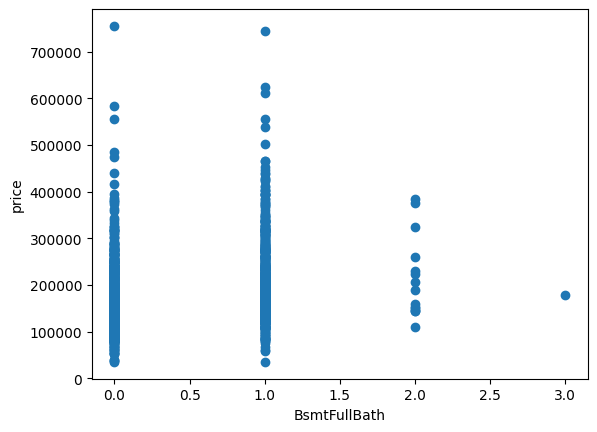

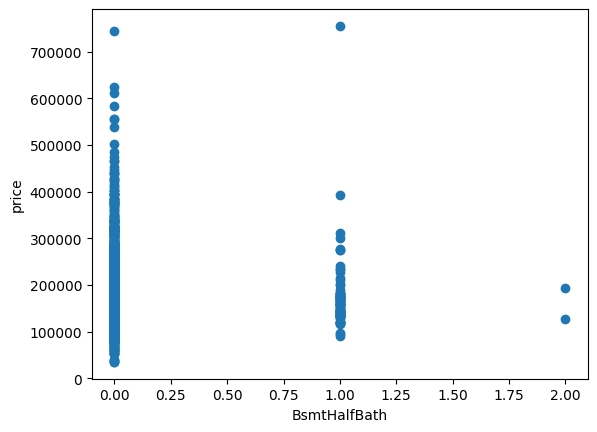

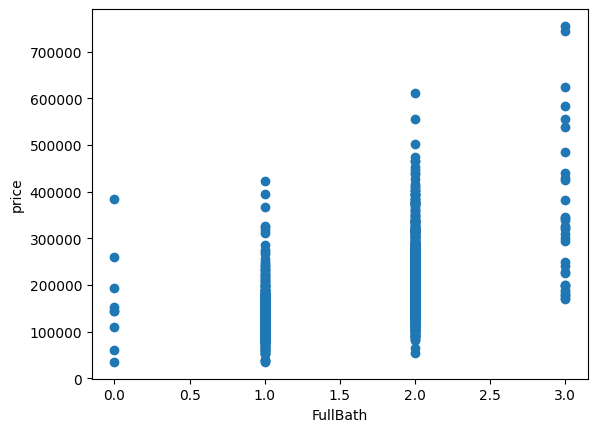

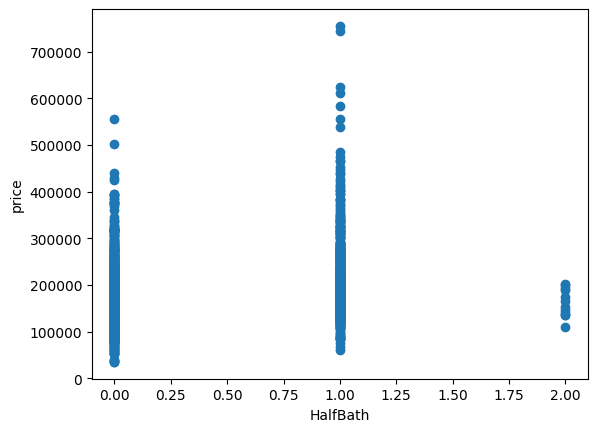

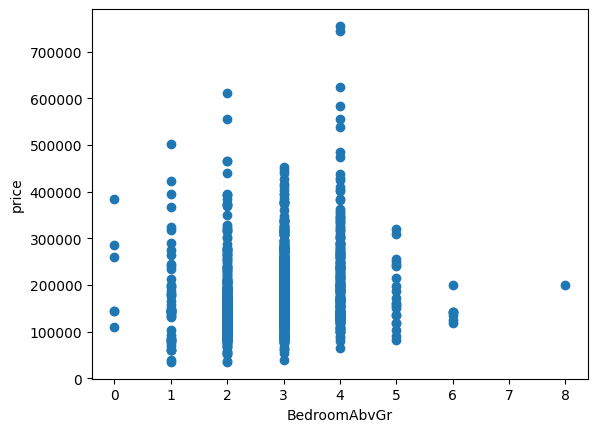

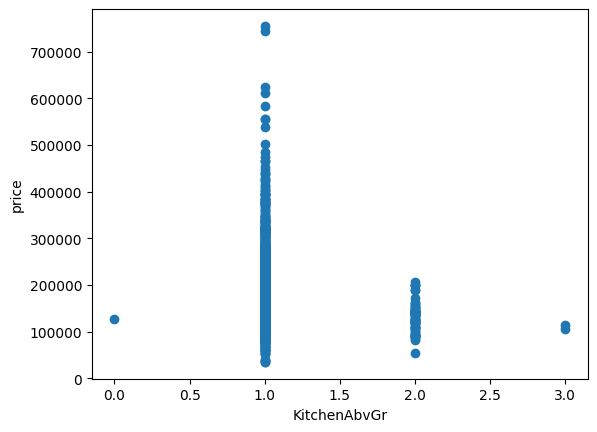

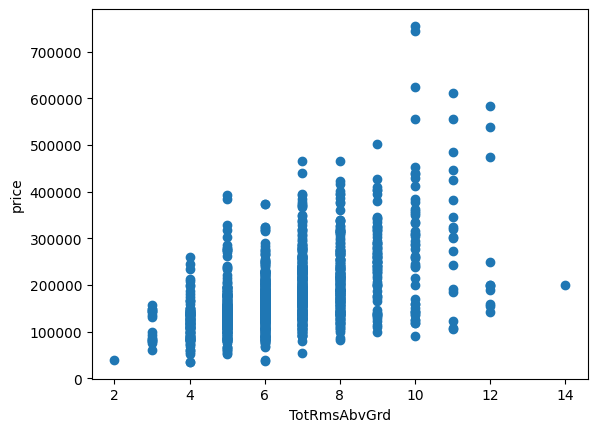

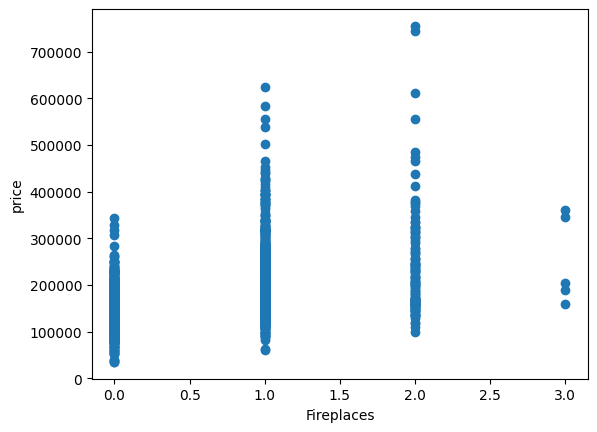

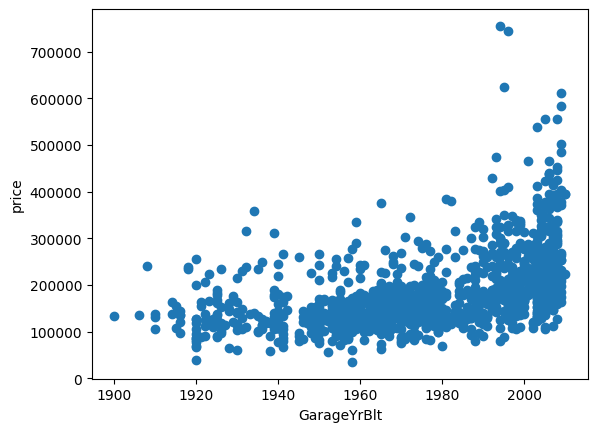

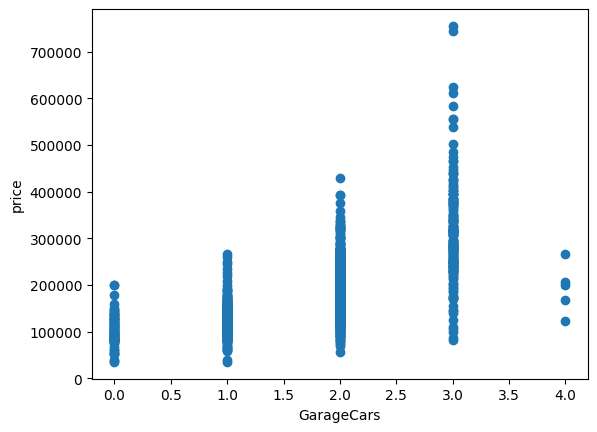

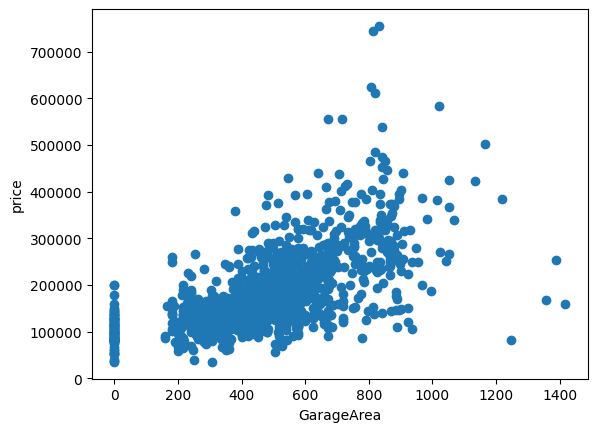

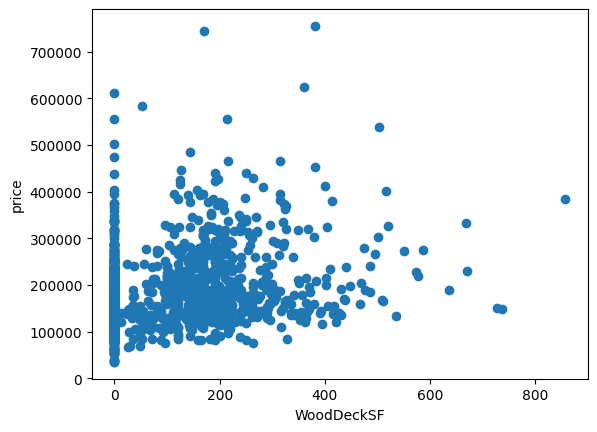

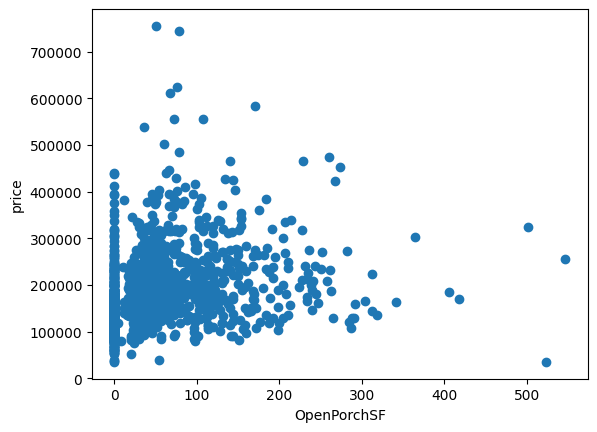

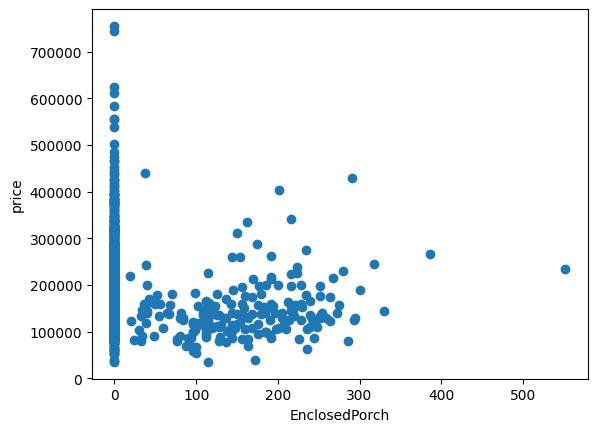

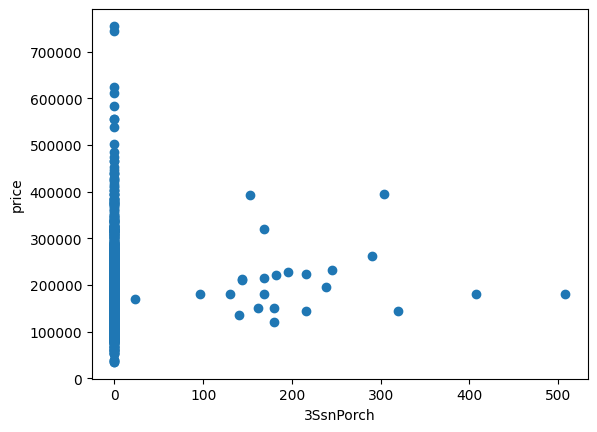

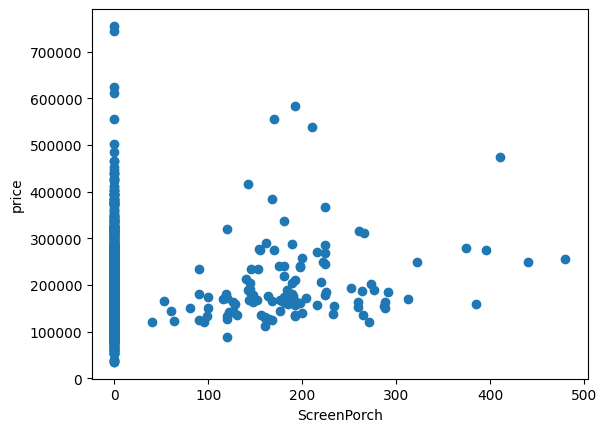

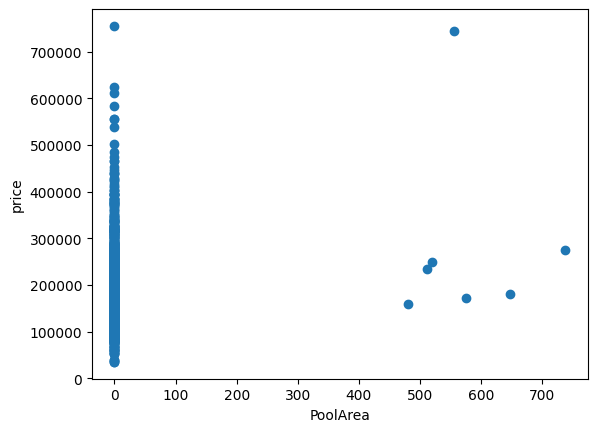

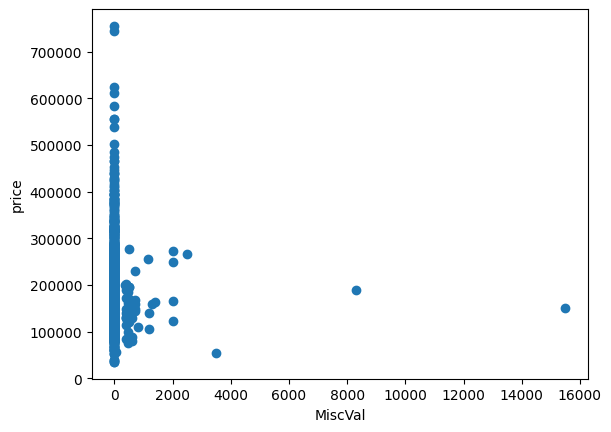

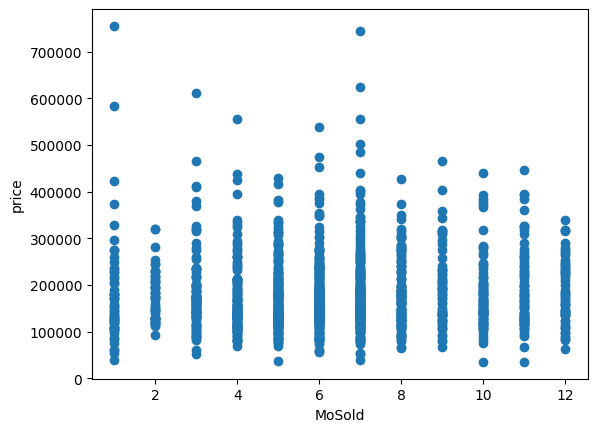

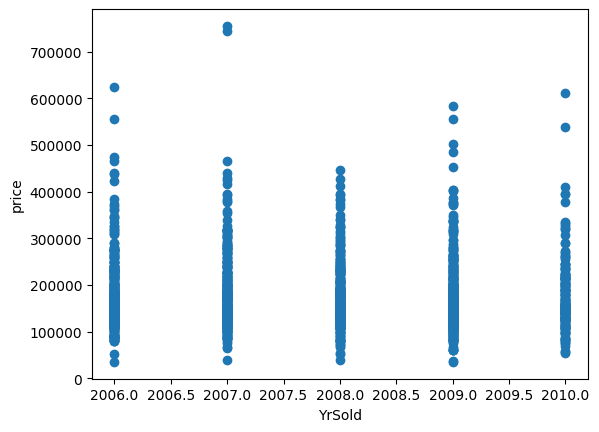

In [4]:
# VISUALIZING THE COLUMN DEPENDENCY AGAINST SELING PRICE FOR FEATURE SELECTION
# Not including columns of object type

for label in df.columns[1:-1]:
  if df[label].dtype != 'object':
    plt.scatter(df[label],df['SalePrice'])
    plt.ylabel('price')
    plt.xlabel(label)
    plt.show()

DATA PREPROCESSING

In [43]:
# Manually selected the unnecessary columns and loading the others in training dataset

non_col = ['YrSold', 'MoSold', 'MiscVal', 'PoolArea', '3SsnPorch', 'Fireplaces', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'LowQualFinSF', 'BsmtFinSF2', 'OverallCond', 'MSSubClass']
col1 = [col for col in df.columns[1:-1] if col not in non_col and df[col].dtype == 'int64']
x_train = df[col1]
y_train = np.array(df['SalePrice'])/100000

In [44]:
x_train.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,8450,7,2003,2003,706,150,856,856,854,1710,1,8,2,548,0,61,0,0
1,9600,6,1976,1976,978,284,1262,1262,0,1262,0,6,2,460,298,0,0,0
2,11250,7,2001,2002,486,434,920,920,866,1786,1,6,2,608,0,42,0,0
3,9550,7,1915,1970,216,540,756,961,756,1717,1,7,3,642,0,35,272,0
4,14260,8,2000,2000,655,490,1145,1145,1053,2198,1,9,3,836,192,84,0,0


In [21]:
x_train.shape

(1460, 18)

FEATURE SCALING

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

X_train  = pd.DataFrame(x_train_scaled)

In [23]:
X_train.shape

(1460, 18)

In [46]:
#SPLITING THE DATA FOR TUNING HYPER PARAMETER 'K'

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state =42)



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
mse = []
for k in range(3,20):
  # Create a KNN regressor with, for example, k=3 (number of neighbors)
  knn_regressor = KNeighborsRegressor(n_neighbors=k)

  # Train the regressor on the training data
  knn_regressor.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = knn_regressor.predict(X_test)
  mse.append(mean_squared_error(y_test, y_pred))

best_k = mse.index(min(mse)) + 3


print("Best K is :", best_k)
print("Mean Squared Error:", min(mse))



Best K is : 3
Mean Squared Error: 0.12145213080205482


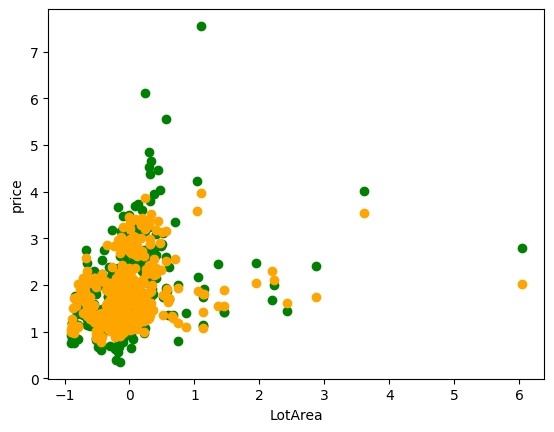

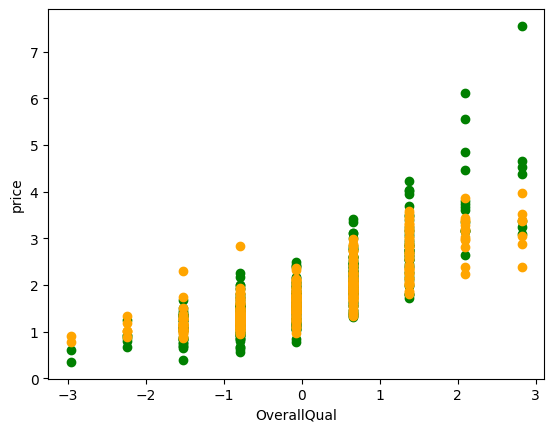

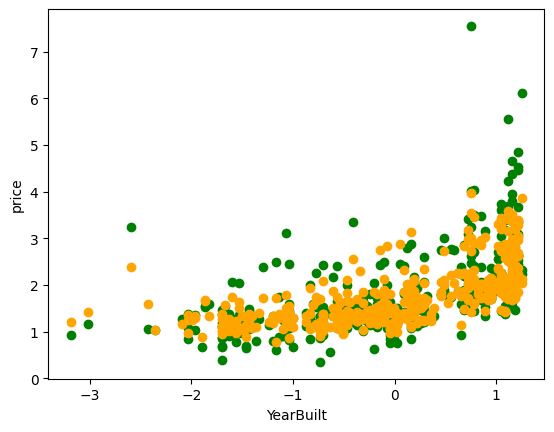

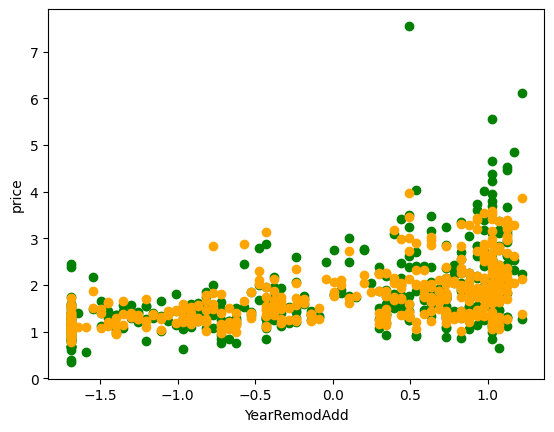

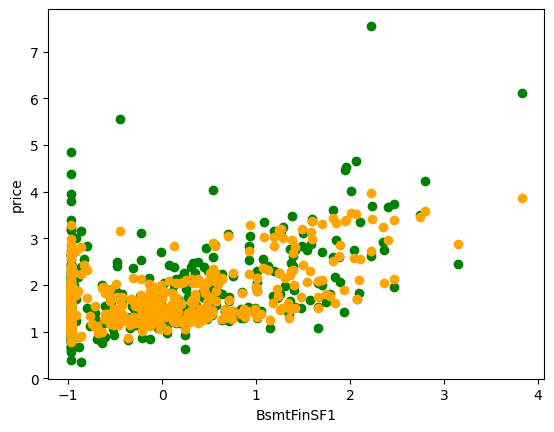

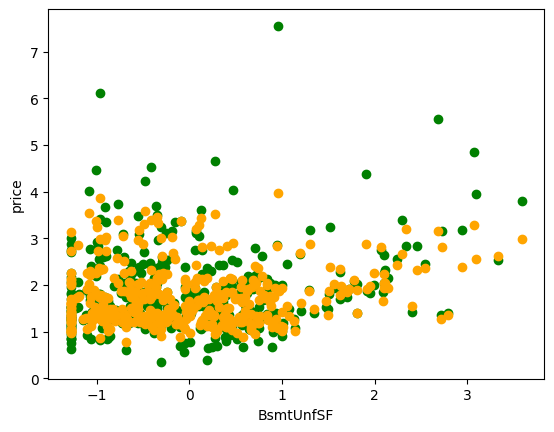

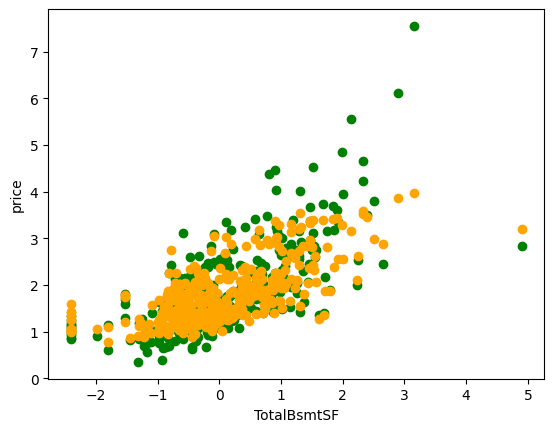

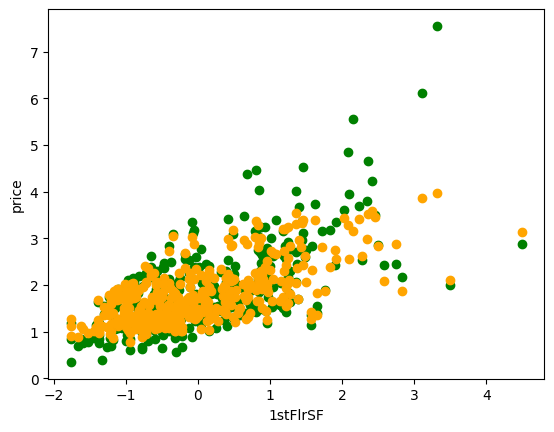

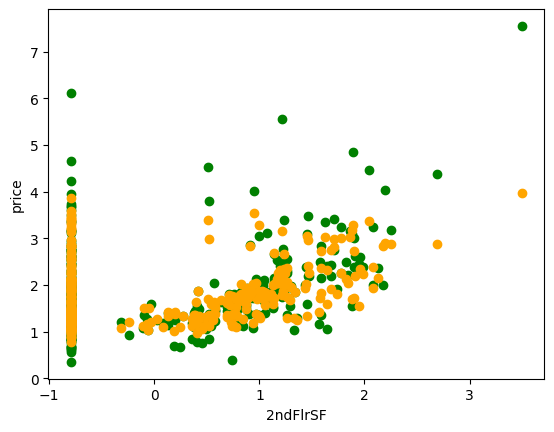

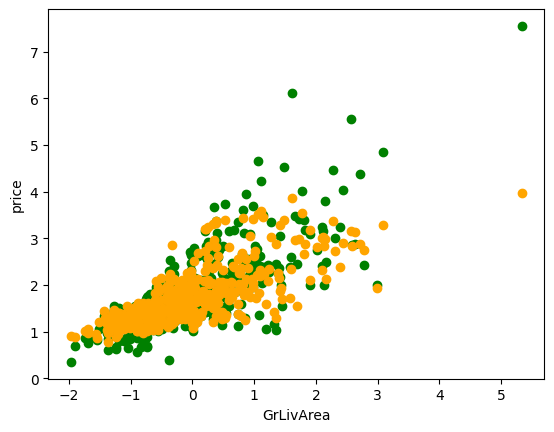

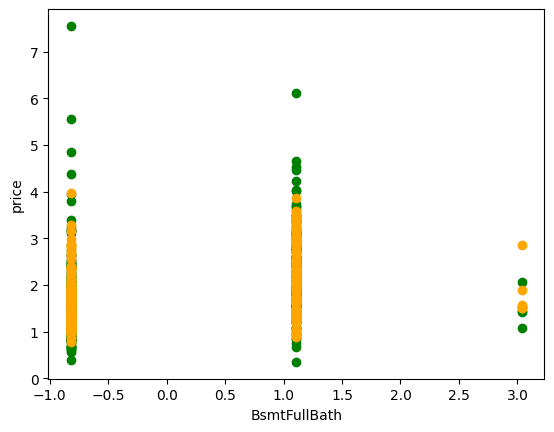

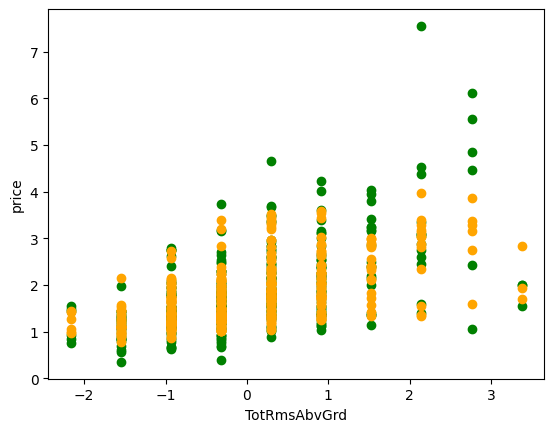

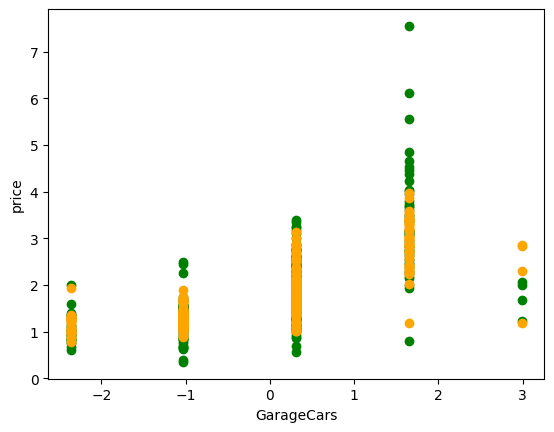

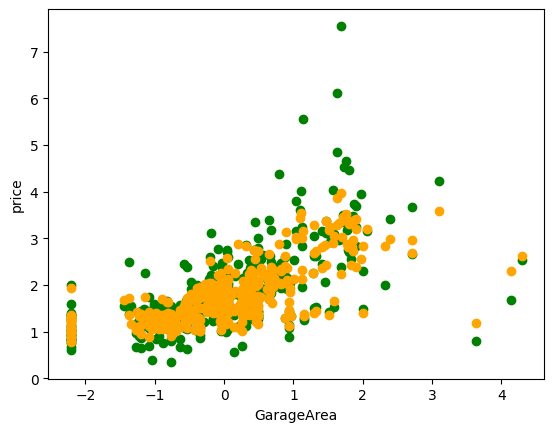

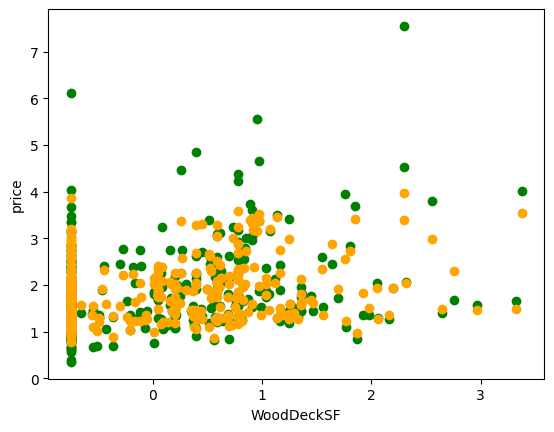

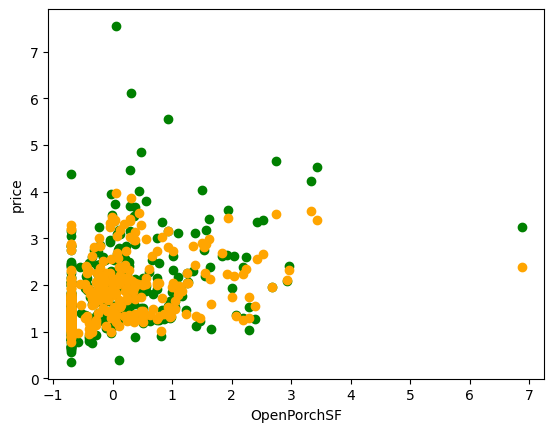

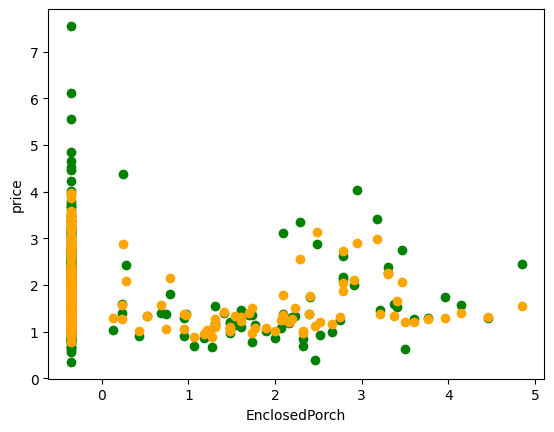

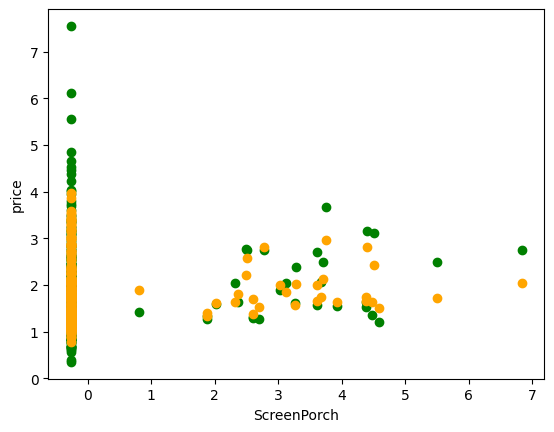

In [51]:
for i in range(X_test.shape[1]):

  plt.scatter(X_test[i],y_test,color = 'g')
  plt.scatter(X_test[i],y_pred,color = 'orange')
  plt.ylabel('price')
  plt.xlabel(col1[i])
  plt.show()